In [1]:
from keras import layers
from keras import models
import tensorflow as tf
import efficientnet.keras as efn

Using TensorFlow backend.


In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = tf.Session(config=config)

In [3]:
# efficientnet-B0 모델 사용
conv_base = efn.EfficientNetB0()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
model = models.Sequential()
model.add(conv_base)
#model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
conv_base.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 32) 0           stem_bn[0][0]                    
____________________________________________________________________________________

Total params: 5,330,564
Trainable params: 5,288,548
Non-trainable params: 42,016
__________________________________________________________________________________________________


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b0 (Model)      (None, 1000)              5330564   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1001      
Total params: 5,331,565
Trainable params: 5,289,549
Non-trainable params: 42,016
_________________________________________________________________


In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train = './train'
validation = './validation'

In [10]:
# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20,\
                                   width_shift_range=0.2,\
                                   height_shift_range=0.2,\
                                   shear_range=0.2,\
                                   zoom_range=0.2,\
                                   horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train,
        target_size=(224, 224),
        batch_size=5,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation,
        target_size=(224, 224),
        batch_size=5,
        class_mode='binary')

Found 1200 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (5, 224, 224, 3)
배치 레이블 크기: (5,)


In [12]:
# 젯슨 나노 트레이닝
history = model.fit_generator(
      train_generator,
      steps_per_epoch=240,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=100, workers=4)


Epoch 1/50
240/240 [==============================] - 471s 2s/step - loss: 0.6870 - acc: 0.6683 - val_loss: 0.6895 - val_acc: 0.7840
Epoch 2/50
240/240 [==============================] - 377s 2s/step - loss: 0.6696 - acc: 0.8017 - val_loss: 0.6446 - val_acc: 0.8300
Epoch 3/50
240/240 [==============================] - 332s 1s/step - loss: 0.6592 - acc: 0.8308 - val_loss: 0.6676 - val_acc: 0.8740
Epoch 4/50
240/240 [==============================] - 338s 1s/step - loss: 0.6532 - acc: 0.8342 - val_loss: 0.6599 - val_acc: 0.8840
Epoch 5/50
240/240 [==============================] - 314s 1s/step - loss: 0.6451 - acc: 0.8483 - val_loss: 0.6195 - val_acc: 0.8980
Epoch 6/50
240/240 [==============================] - 330s 1s/step - loss: 0.6368 - acc: 0.8642 - val_loss: 0.6449 - val_acc: 0.9080
Epoch 7/50
240/240 [==============================] - 294s 1s/step - loss: 0.6310 - acc: 0.8642 - val_loss: 0.6030 - val_acc: 0.9180
Epoch 8/50
240/240 [==============================] - 293s 1s/step -


KeyboardInterrupt



In [13]:
import matplotlib.pyplot as plt

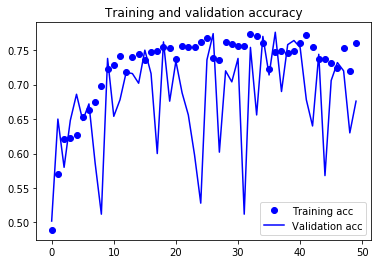

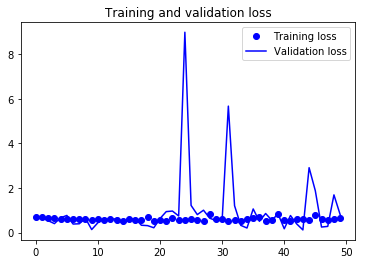

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
model.save('model_.h5')